<a href="https://colab.research.google.com/github/GustavoBD-Dev/StatisticalTechniquesAndDataMining/blob/ModelTimeSeries/RegresionAndTimeSeries/TimeSeries/Notes_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo

* Una serie de datos de tiempo es una serie de puntos de datos u observaciones registradas en intervalos de tiempo diferentes o regulares. En general, una serie de tiempo es una secuencia de puntos de datos tomados en intervalos de tiempo igualmente espaciados. La frecuencia de los puntos de datos registrados puede ser horaria, diaria, semanal, mensual, trimestral o anual.
* La previsión de series temporales es el proceso de utilizar un modelo estadístico para predecir valores futuros de una serie temporal en función de resultados pasados.
* Un análisis de series temporales abarca métodos estadísticos para analizar datos de series temporales. Estos métodos nos permiten extraer estadísticas significativas, patrones y otras características de los datos. Las series de tiempo se visualizan con la ayuda de gráficos de líneas. Por lo tanto, el análisis de series de tiempo implica comprender los aspectos inherentes de los datos de la serie de tiempo para que podamos crear pronósticos significativos y precisos.
## Componentes de una serie de tiempo
* Tendencia: la tendencia muestra una dirección general de los datos de la serie temporal durante un largo período de tiempo. Una tendencia puede ser creciente (hacia arriba), decreciente (hacia abajo) u horizontal (estacionaria).
* Estacionalidad: el componente de estacionalidad exhibe una tendencia que se repite con respecto al momento, la dirección y la magnitud.
* Componente cíclico: estas son las tendencias sin repetición establecida durante un período de tiempo particular. Un ciclo se refiere al período de altibajos, auges y depresiones de una serie de tiempo, que se observa principalmente en los ciclos económicos. Estos ciclos no exhiben una variación estacional pero generalmente ocurren durante un período de tiempo de 3 a 12 años dependiendo de la naturaleza de la serie de tiempo.
* Variación irregular: estas son las fluctuaciones en los datos de la serie temporal que se hacen evidentes cuando se eliminan las variaciones cíclicas y de tendencia. Estas variaciones son impredecibles, erráticas y pueden o no ser aleatorias.
* Descomposición ETS: la descomposición ETS se utiliza para separar diferentes componentes de una serie temporal. El término ETS significa error, tendencia y estacionalidad.
## Terminología
* Dependencia- Se refiere a la asociación de dos observaciones de la misma variable en periodos de tiempo anteriores.

* Estacionariedad- Muestra el valor medio de la serie que se mantiene constante a lo largo del periodo de tiempo. Si los efectos del pasado se acumulan y los valores aumentan hacia el infinito, entonces no se cumple la estacionariedad.

* Diferenciación: la diferenciación se utiliza para hacer que la serie sea estacionaria y para controlar las autocorrelaciones. Puede haber algunos casos en los análisis de series de tiempo en los que no se requiera la diferenciación y las series sobrediferenciadas pueden producir estimaciones incorrectas.

* Especificación: puede implicar la prueba de las relaciones lineales o no lineales de las variables dependientes mediante el uso de modelos de series temporales como los modelos ARIMA.

* Suavizado exponencial: el suavizado exponencial en el análisis de series de tiempo predice el valor del próximo período en función del valor pasado y actual. Implica promediar los datos de manera que los componentes no sistemáticos de cada caso individual u observación se anulen entre sí. El método de suavizado exponencial se utiliza para predecir la predicción a corto plazo.

* Ajuste de curvas: la regresión de ajuste de curvas en el análisis de series temporales se utiliza cuando los datos se encuentran en una relación no lineal.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Text(0.5, 1.0, 'Histórico Viajantes')

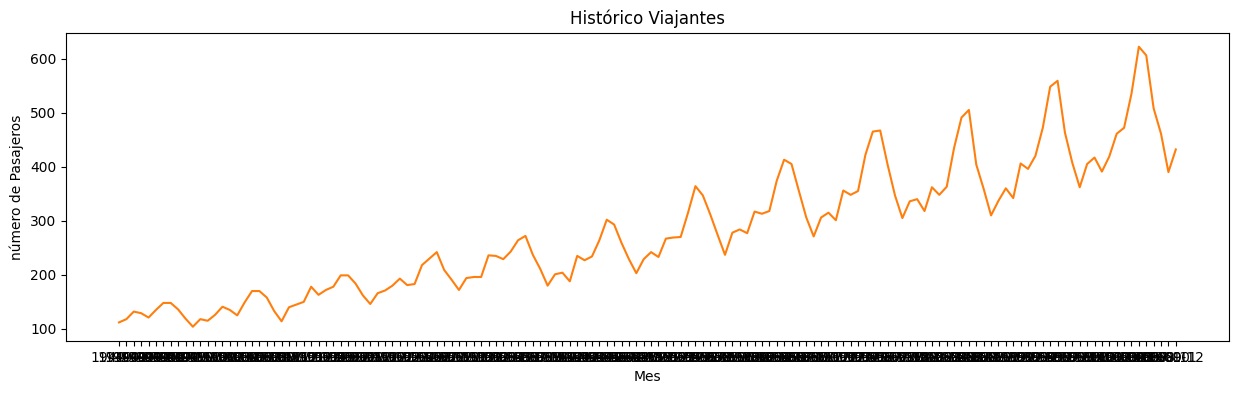

In [ ]:
plt.figure (figsize=(15,4), dpi=100)
plt.plot(df['Month'],df['#Passengers'], color='tab:orange' )
plt.xlabel('Mes')
plt.ylabel('número de Pasajeros')
plt.title('Histórico Viajantes')

## Reconocimiento de patrones
1. Tendencia: Se observa una tendencia cuando se observa una pendiente creciente o decreciente en la serie de tiempo.
2. Estacionalidad: Se observa una estacionalidad cuando se observa un patrón repetido distinto entre intervalos regulares debido a factores estacionales. Podría ser por el mes del año, el día del mes, los días de semana o incluso la hora del día.
3. Ciclos o periodicidad: Otra cosa importante a considerar es el comportamiento cíclico. Ocurre cuando el patrón de subida y bajada de la serie no ocurre en intervalos fijos basados en el calendario. No debemos confundir efecto 'cíclico' con efecto 'estacional'. Si los patrones no son de frecuencias fijas basadas en el calendario, entonces es cíclico. Porque, a diferencia de la estacionalidad, los efectos cíclicos suelen estar influenciados por el negocio y otros factores socioeconómicos.

Sin embargo, no es obligatorio que todas las series temporales tengan tendencia y/o estacionalidad. Una serie de tiempo puede no tener una tendencia definida pero sí una estacionalidad y viceversa.

## Decomposición de Series de Tiempo
La descomposición de una serie temporal se puede realizar considerando la serie como una combinación aditiva o multiplicativa del nivel base, la tendencia, el índice estacional y el término residual. El método season_decompose en statsmodels implementa esto convenientemente.

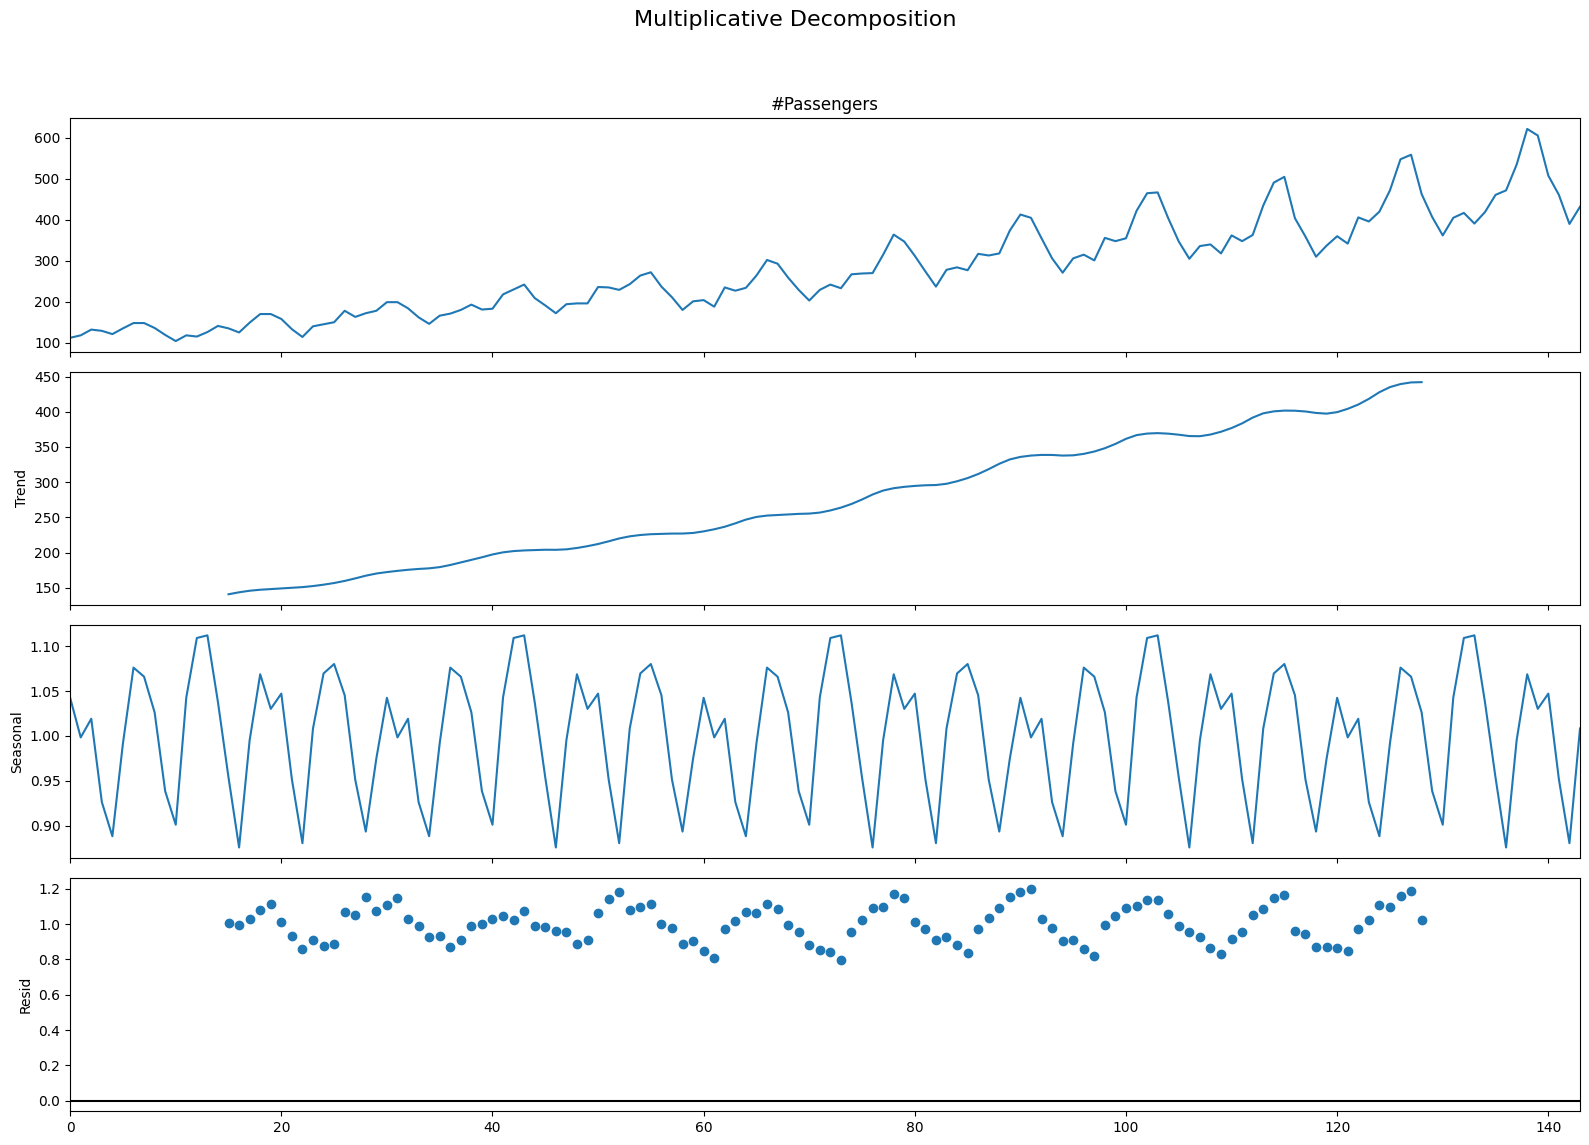

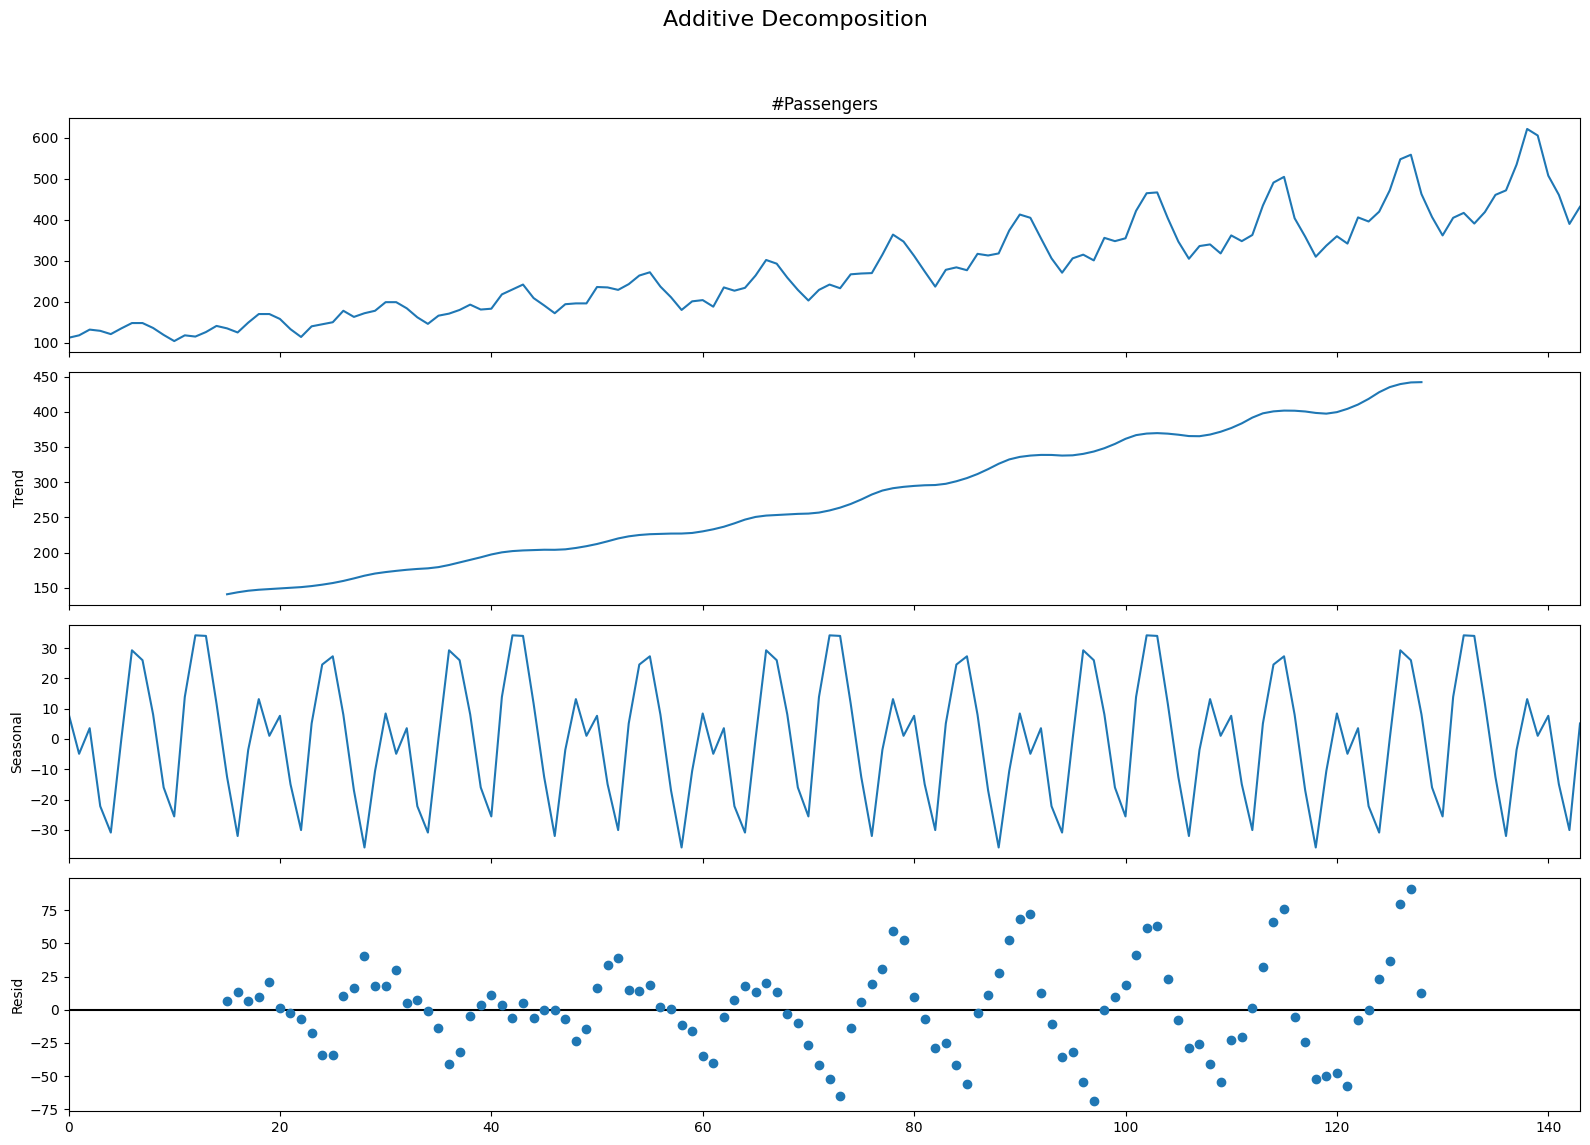

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['#Passengers'], model='additive', period=30)

# GRAFICACIÓN
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Estacionariedad
Una serie estacionaria es aquella en la que los valores de la serie no son una función del tiempo. Por lo tanto, los valores son independientes del tiempo.

Por lo tanto, las propiedades estadísticas de la serie, como la media, la varianza y la autocorrelación, son constantes en el tiempo. La autocorrelación de la serie no es más que la correlación de la serie con sus valores anteriores.

Una serie temporal estacionaria también es independiente de los efectos estacionales. Ahora, trazaremos algunos ejemplos de series de tiempo estacionarias y no estacionarias para mayor claridad.

Podemos convertir cualquier serie temporal no estacionaria en estacionaria aplicando una transformación adecuada. La mayoría de los métodos de pronóstico estadístico están diseñados para trabajar en una serie de tiempo estacionaria. El primer paso en el proceso de pronóstico suele ser hacer alguna transformación para convertir una serie no estacionaria en estacionaria.

* ¿Cómo hacer una serie estacionaria?

- Podemos aplicar algún tipo de transformación para hacer que la serie temporal sea estacionaria. Estas transformaciones pueden incluir:
- Diferenciando la Serie (una o más)
- Toma el registro de la serie.
- Saca la raíz enésima de la serie
- Combinación de lo anterior El método más comúnmente usado y conveniente para estacionarizar la serie es diferenciar la serie al menos una vez hasta que se vuelva aproximadamente estacionaria.
- Pronosticar una serie estacionaria es relativamente fácil y los pronósticos son más confiables.

Una razón importante es que los modelos de pronóstico autorregresivos son esencialmente modelos de regresión lineal que utilizan los retrasos de la serie en sí como predictores. Sabemos que la regresión lineal funciona mejor si los predictores (X variables) no están correlacionados entre sí. Por lo tanto, estacionarizar la serie resuelve este problema ya que elimina cualquier autocorrelación persistente, lo que hace que los predictores (retrasos de la serie) en los modelos de pronóstico sean casi independientes.

In [ ]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

Para saber si una serie es $I(0)$ la prueba Dickey-Fuller Aumentada.
$$H_0: \ serie \ no \ estacionaria$$

¿Cual es el estadistico de prueba de la prueba D-F?

In [ ]:
# ADF Test
prueba_DF = adfuller(df['#Passengers'], autolag='AIC') #Ho: serie No estacionaria

print(f'ADF Statistic: {prueba_DF[0]}')
print(f'n_lags: {prueba_DF[2]}')
print(f'p-value: {prueba_DF[1]}')
for key, value in   prueba_DF[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.8153688792060498
n_lags: 13
p-value: 0.991880243437641
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598


Otro constante analogo es: KPSS (Kwiatkpw-Phillips-Shin)

In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss
#def kpss_test(series, **kw):
statistic, p_value, n_lags, critical_values = kpss(df['#Passengers'])#, **kw)
    # Format Output

print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')
for key, value in critical_values.items():
        print(f'   {key} : {value}')
print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

#kpss_test(series)

KPSS Statistic: 1.6513122354165206
p-value: 0.01
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


<ipython-input-19-7ae855369d75>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df['#Passengers'])#, **kw)


Y tambien Phillips-Perron (es más robusto): $H_0$: la serie es integrada de orden 1
$H_0:$

In [ ]:
%pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 17.9 MB/s eta 0:00:00


In [ ]:
from arch.unitroot import *
#from unit_root_test import pp_tets
pptest = PhillipsPerron(df['#Passengers'])
pptest.summary()

Test Statistic,-1.351
P-value,0.605
Lags,14


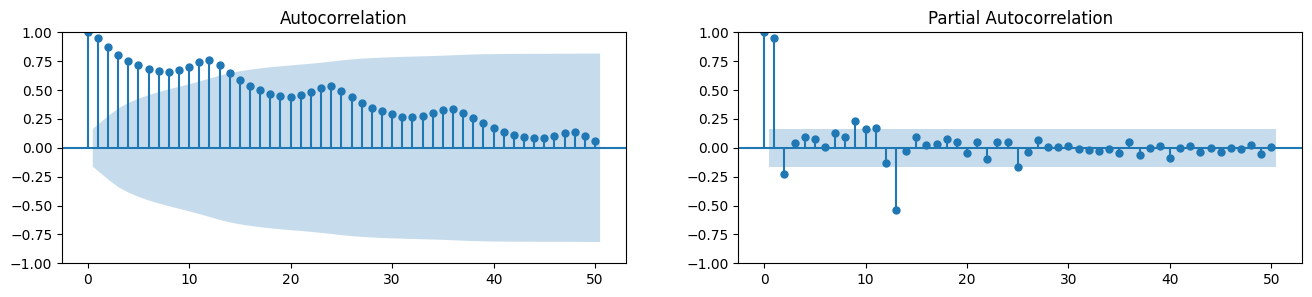

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['#Passengers'].tolist(), lags=50, ax=axes[0])  #tolist() los datos los comvierta a una lista
plot_pacf(df['#Passengers'].tolist(), lags=50, ax=axes[1])
plt.show()

Diferencias (tratamiento de la NO estacionariedad en media)

Text(0.5, 1.0, 'sustracción de la tendencia con MCO para numero de Pasajeros aereos')

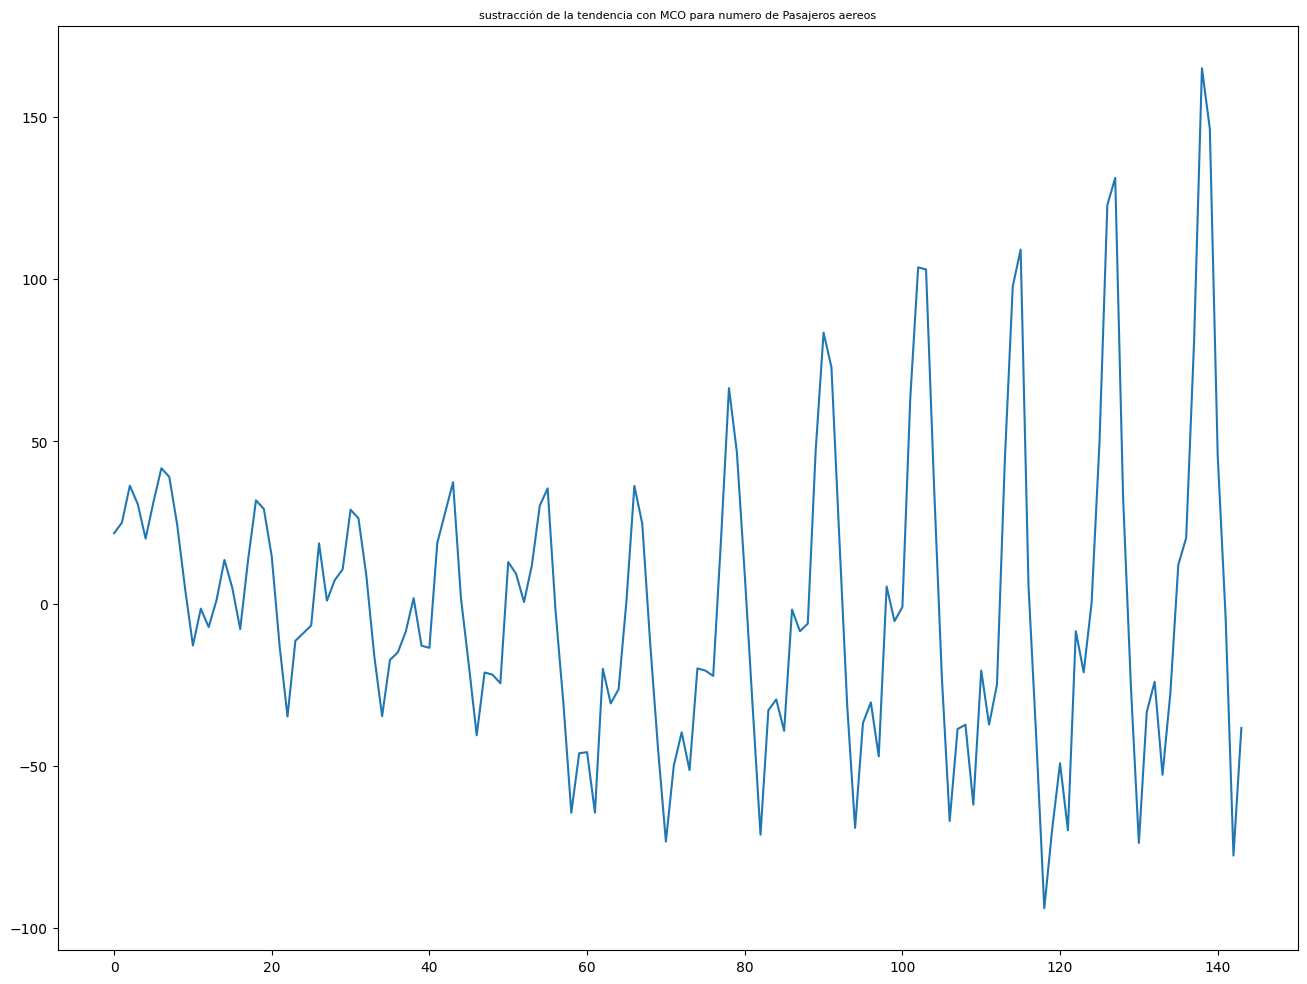

In [ ]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['#Passengers'].values)
plt.plot(detrended)
plt.title('sustracción de la tendencia con MCO para numero de Pasajeros aereos', fontsize=16)

Segunda diferencia


Text(0.5, 1.0, 'Segunda diferencia para numero de Pasajeros aeroes')

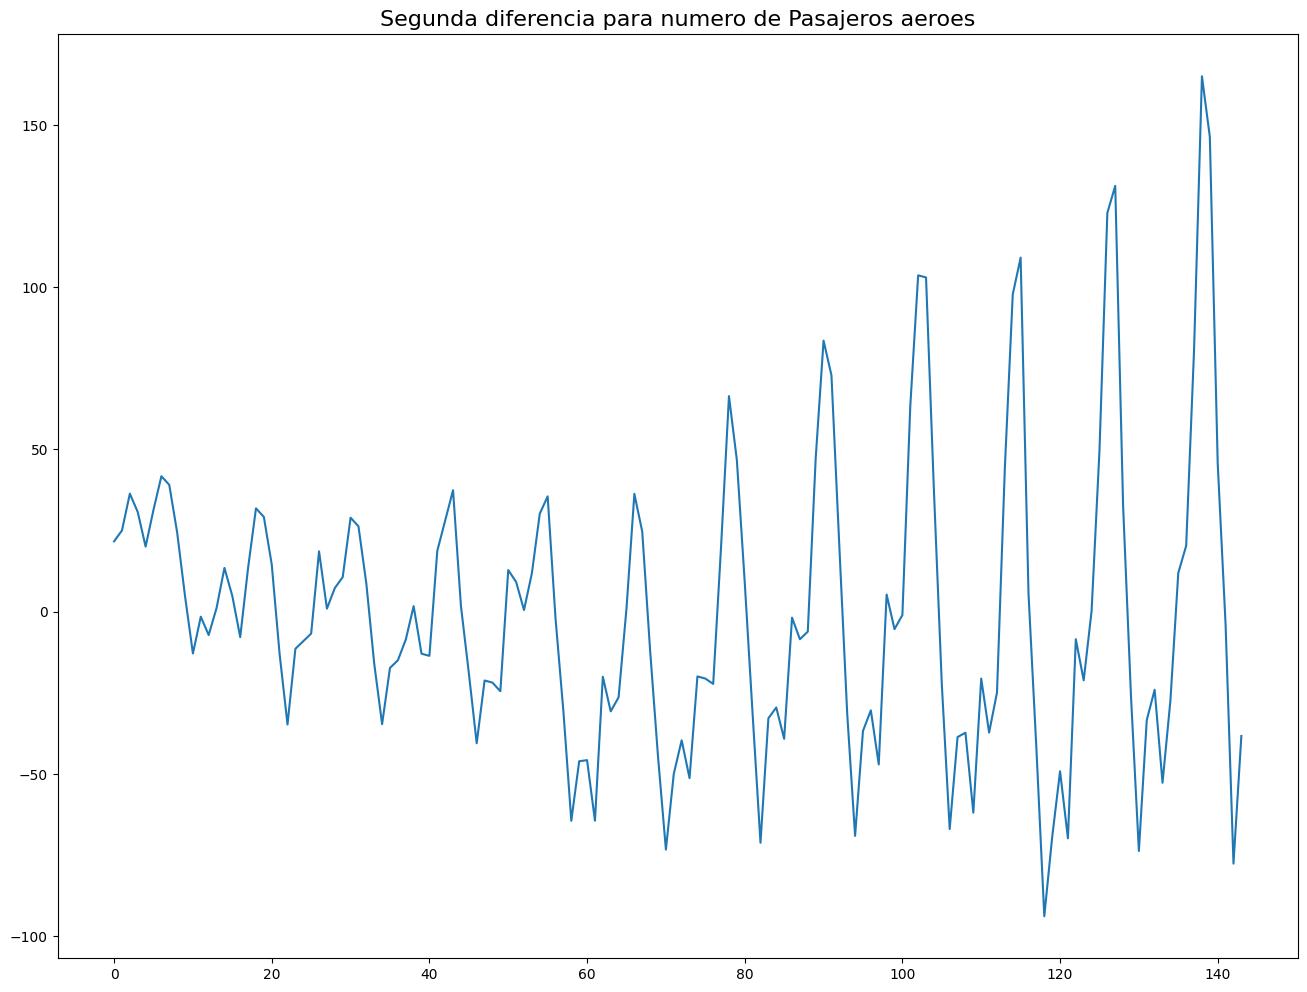

In [ ]:
# Segunda diferencia
detrended2 = signal.detrend(detrended)
plt.plot(detrended2)
plt.title('Segunda diferencia para numero de Pasajeros aeroes', fontsize=16)

Transformaciones

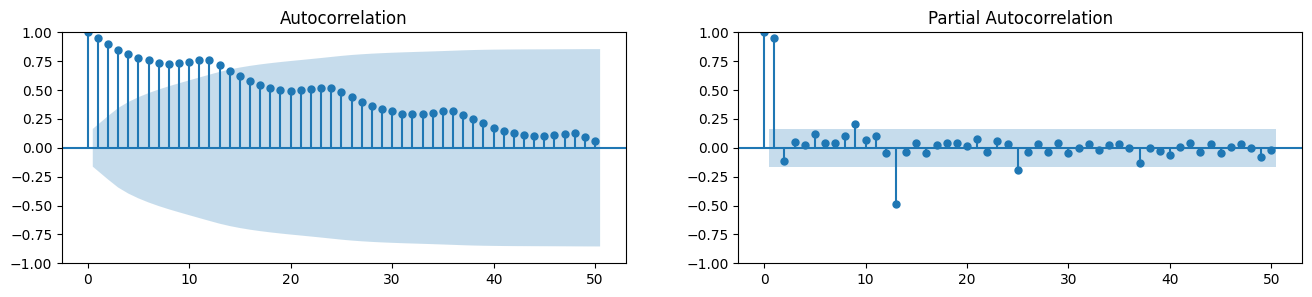

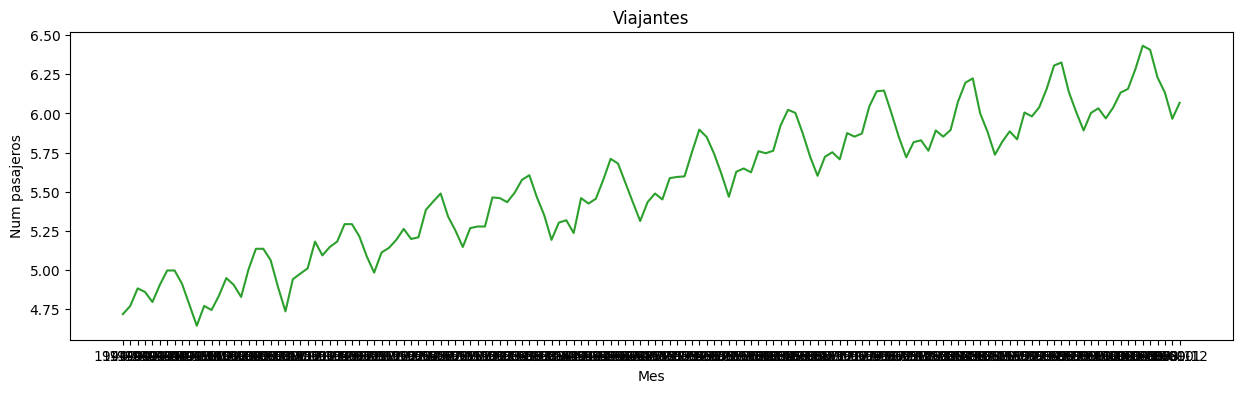

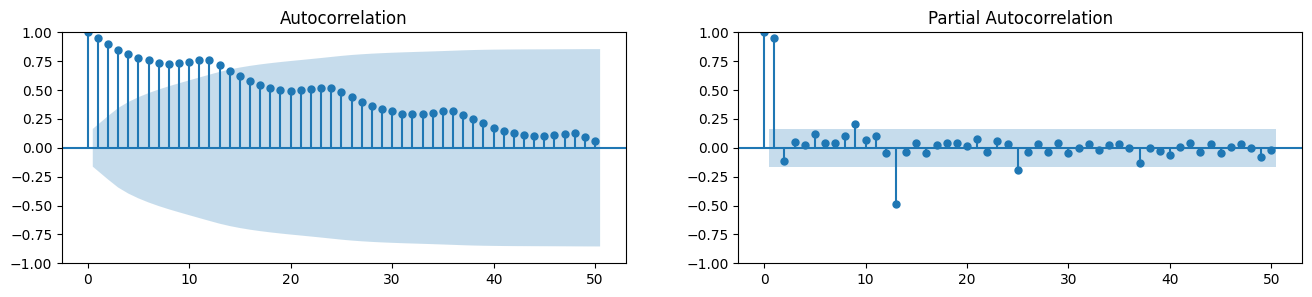

In [ ]:
# import numpy as np
# Tomando logaritmo
ts_data_trasformer = np.log(df['#Passengers'])
ts_data_trasformer_dif = np.log(detrended)

# Gráfica original
plt.figure(figsize= (15,4), dpi=100) # dpi es el zoon
plt.plot(df['Month'],ts_data_trasformer, color= 'tab:green')
plt.xlabel('Mes')
plt.ylabel('Num pasajeros')
plt.title('Viajantes' )

# FAC y FACP
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(ts_data_trasformer, lags=50, ax=axes[0])
plot_pacf(ts_data_trasformer, lags=50, ax=axes[1])

## FAC y FACP log diferencia
#fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
#plot_acf(df['Pasajeros'].tolist(), lags=50, ax=axes[0])
#plot_pacf(df['Pasajeros'].tolist(), lags=50, ax=axes[1])

Box-Cox

Lambda de la transformación Box-Cox: 0.14802254856840585


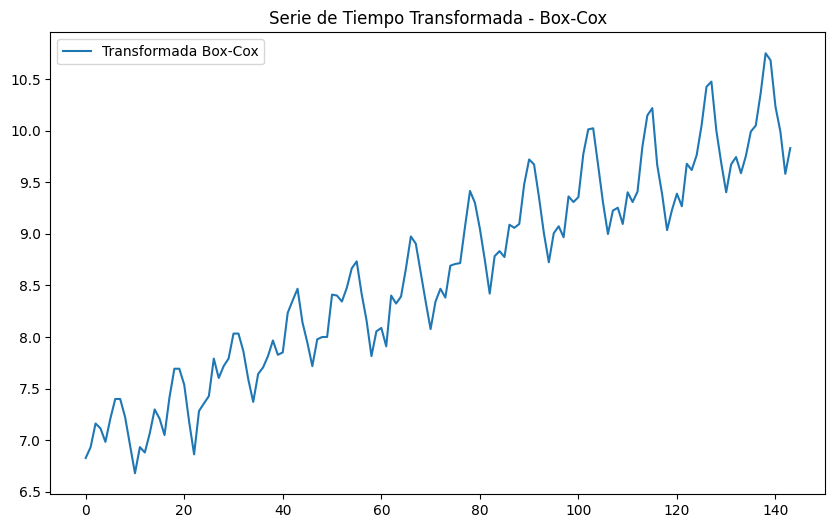

In [ ]:
from scipy import stats
# Aplicar la transformación Box-Cox
pasajeros = df['#Passengers']  # Reemplaza '#Passengers' con el nombre correcto de la columna si es diferente
pasajeros_boxcox, lambda_param = stats.boxcox(pasajeros)

# Mostrar el valor de lambda
print(f'Lambda de la transformación Box-Cox: {lambda_param}')

# Graficar la serie transformada
plt.figure(figsize=(10, 6))
plt.plot(pasajeros_boxcox, label='Transformada Box-Cox')
plt.title('Serie de Tiempo Transformada - Box-Cox')
plt.legend()
plt.show()

Desestacionalizar la serie

[]

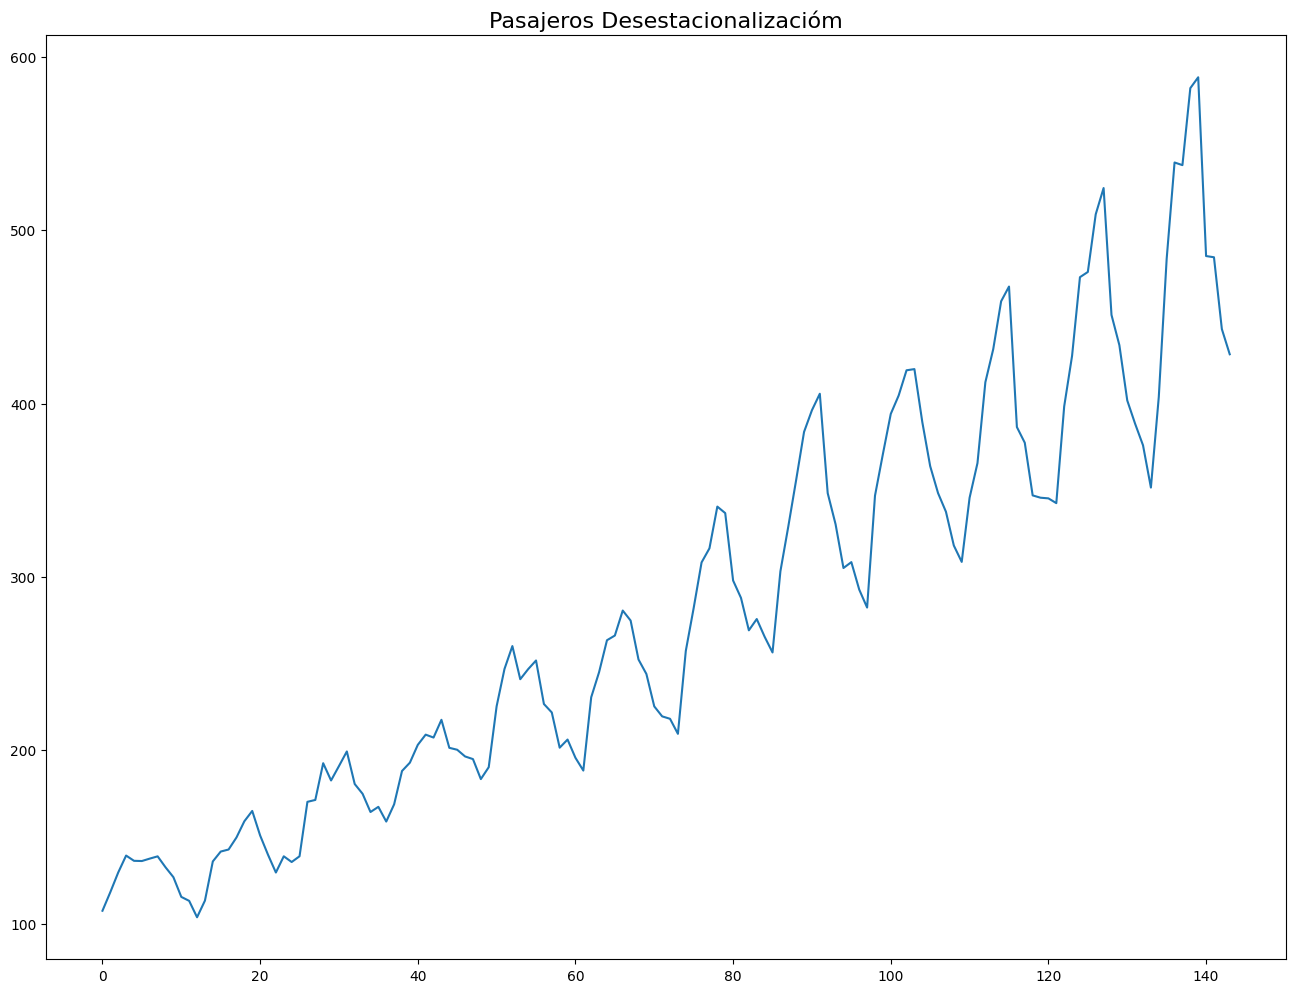

In [ ]:
# Subtracting the Trend Component
# Time Series Decomposition
result_mul = seasonal_decompose(df['#Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['#Passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Pasajeros Desestacionalizacióm', fontsize=16)
plt.plot()

Estimación


In [ ]:
#from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(df['#Passengers'], order = (4, 1, 2))
mod_salida = modelo.fit()
mod_salida.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -679.780
Date:                Sat, 17 Aug 2024   AIC                           1373.560
Time:                        18:35:58   BIC                           1394.300
Sample:                             0   HQIC                          1381.988
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2049      0.118      1.734      0.083      -0.027       0.437
ar.L2          0.3601      0.119      3.018      0.003       0.126       0.594
ar.L3         -0.2507      0.101     -2.490      0.013      -0.448      -0.053
ar.L4         -0.2229      0.100     -2.238      0.025      -0.418      -0.028
ma.L1          0.0685      0.108      0.636      0.525      -0.143       0.280
ma.L2         -0.7103      0.117     -6.083      0.000      -0.939      -0.481
sigma2       779.8975     95.869      8.135      0.000     591.997     967.798
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 3.42
Prob(Q):                              0.58   Prob(JB):                         0.18
Heteroskedasticity (H):               6.36   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Pronostico

In [ ]:
predictions = mod_salida.get_forecast(len(df['#Passengers']))
predictions_df = predictions.conf_int(alpha = 0.05)
predictions_df["Predictions"] = mod_salida.predict(start =
predictions_df.index[0], end = predictions_df.index[-1])
predictions_df.index = df['#Passengers']
predictions_arma = predictions_df["Predictions"]
predictions_arma
#print(predictions_arma.values[::])
print(predictions_arma.values [0:14] )

[487.96331271 498.3157008  525.88325421 511.86910978 503.85581643
 487.94947937 479.17391157 476.78060989 478.90391139 484.22232812
 488.6324769  491.45227034 491.81151804 490.60952687]


Ljung-Box